# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
#lngs

lat_lngs = zip(lats, lngs)

In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&appid="

url = base_url + weather_api_key
response = requests.get(url).json()
#print(json.dumps(response, indent = 5, sort_keys = True))

In [5]:
#empty lists defined to store findings
country = []
city_name =[]
date = []
cloudiness= []
wind_speed = []
max_temp = []
humidity = []
lat = []
lng = []


#Request data on each city 
count = 1

for city in cities:
    
    query_url = url + "&units=Imperial" + "&q=" +city
    
    response_json = requests.get(query_url).json() 
    
    #print(json.dumps(response_json, indent= 5, sort_keys = True))
    
    try:
        
        country.append(response_json["city"]["country"])
        city_name.append(response_json["city"]["name"])
        date.append(response_json["list"][0]["dt"])
        cloudiness.append(response_json["list"][0]["clouds"]["all"])
        wind_speed.append(response_json["list"][0]["wind"]["speed"])
        max_temp.append(response_json["list"][0]["main"]["temp_max"])
        humidity.append(response_json["list"][0]["main"]["humidity"])
        lat.append(response_json["city"]["coord"]["lat"])  
        lng.append(response_json["city"]["coord"]["lon"])
        
      
        print(f"Processing record {count}|{city}")
        count+=1
        
    except (KeyError, IndexError):
        print("Record not found.skipping.")
        
print("Completed!")
   

Processing record 1|hermanus
Processing record 2|chokurdakh
Processing record 3|mataura
Processing record 4|bontang
Processing record 5|sao geraldo do araguaia
Processing record 6|alofi
Record not found.skipping.
Processing record 7|ushuaia
Processing record 8|belmonte
Processing record 9|uruguaiana
Processing record 10|punta arenas
Processing record 11|narrabri
Processing record 12|jamestown
Processing record 13|airai
Processing record 14|kapaa
Processing record 15|hithadhoo
Record not found.skipping.
Processing record 16|kungur
Processing record 17|new norfolk
Processing record 18|rikitea
Processing record 19|paramonga
Processing record 20|ancud
Processing record 21|hasaki
Record not found.skipping.
Processing record 22|shelburne
Processing record 23|bowen
Processing record 24|bluff
Processing record 25|ormara
Processing record 26|mosetse
Record not found.skipping.
Processing record 27|busselton
Processing record 28|chernyshevskiy
Processing record 29|mayumba
Processing record 30|oka

Processing record 246|nkhotakota
Processing record 247|castro
Processing record 248|san patricio
Record not found.skipping.
Processing record 249|shulan
Processing record 250|bollnas
Processing record 251|flinders
Processing record 252|aguimes
Processing record 253|nouadhibou
Processing record 254|saskylakh
Processing record 255|tautira
Processing record 256|kurali
Processing record 257|mojo
Processing record 258|axim
Processing record 259|peniche
Processing record 260|walvis bay
Processing record 261|belaya gora
Processing record 262|krasnoselkup
Processing record 263|sumter
Processing record 264|mount gambier
Processing record 265|deputatskiy
Record not found.skipping.
Processing record 266|manhush
Processing record 267|wukari
Processing record 268|kainantu
Processing record 269|grand gaube
Processing record 270|pontarlier
Processing record 271|piney green
Processing record 272|sur
Processing record 273|evensk
Processing record 274|kahului
Processing record 275|fez
Processing record 

Processing record 491|senanga
Processing record 492|nizhnyaya tavda
Processing record 493|springbok
Processing record 494|mancio lima
Processing record 495|micomeseng
Processing record 496|korla
Processing record 497|berlevag
Processing record 498|hua hin
Processing record 499|hede
Processing record 500|antalaha
Processing record 501|kasganj
Processing record 502|kasongo-lunda
Processing record 503|springfield
Processing record 504|abu samrah
Processing record 505|torit
Processing record 506|carutapera
Processing record 507|mana
Processing record 508|bassano
Processing record 509|male
Processing record 510|san rafael
Processing record 511|nicoya
Processing record 512|ilulissat
Processing record 513|novobirilyussy
Processing record 514|salinas
Processing record 515|morondava
Processing record 516|omsk
Record not found.skipping.
Processing record 517|kendal
Record not found.skipping.
Processing record 518|nosy varika
Record not found.skipping.
Processing record 519|port-gentil
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_data = pd.DataFrame({"City":city_name, "Cloudiness":cloudiness,"Country":country, 
                          "Date":date, "Humidity":humidity, "Latitude":lat,"Longitude":lng, 
                         "Max Temp":max_temp, "Wind Speed":wind_speed})

#weather_data =weather_data.rename_axis("City ID")

#Export the city data into a .csv.
weather_data.to_csv("../output_data/weather.csv")
#Display the DataFrame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Hermanus,0,ZA,1635141600,70,-34.4187,19.2345,58.08,13.02
1,Chokurdakh,100,RU,1635141600,99,70.6333,147.9167,-4.72,3.02
2,Mataura,97,NZ,1635141600,78,-46.1927,168.8643,60.85,2.71
3,Bontang,100,ID,1635141600,73,0.1333,117.5000,83.41,10.49
4,São Geraldo do Araguaia,68,BR,1635141600,92,-6.4006,-48.5550,74.19,0.56


In [9]:
#weather_data.dtypes
#weather_data.dtypes == object

In [10]:
weather_data.value_counts()

City           Cloudiness  Country  Date        Humidity  Latitude  Longitude  Max Temp  Wind Speed
Aasiaat        94          GL       1635141600  97         68.7098  -52.8699   4.06      7.34          1
Pervomayskoye  100         RU       1635141600  55         43.9190   46.7102   51.12     18.19         1
Paramonga      27          PE       1635141600  88        -10.6667  -77.8333   61.59     8.66          1
Partizanskoye  100         RU       1635141600  72         55.5006   94.3900   46.53     19.42         1
Pekan          59          MY       1635141600  66         3.4836    103.3996  89.06     5.03          1
                                                                                                      ..
Honningsvåg    0           NO       1635141600  80         70.9821   25.9704   35.47     18.84         1
Hong Kong      63          HK       1635141600  72         22.2855   114.1577  76.66     5.50          1
Hofn           100         IS       1635141600  64         6

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#weather_data.count()

In [12]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = weather_data.loc[weather_data["Humidity"] > 100]
high_humidity

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [14]:
clean_city_data= weather_data.dropna(inplace = False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

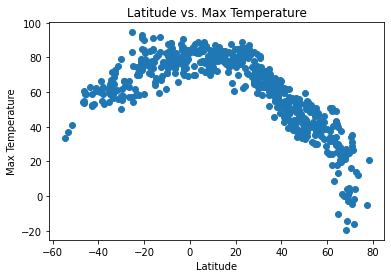

In [59]:
#create a scatter plot for latitude vs max temperature to see the relationship between them
x= weather_data["Latitude"]
y1 = weather_data["Max Temp"]

plt.scatter(x,y1)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs. Max Temperature")
plt.savefig("latvsmaxtemp")
plt.show()

In [60]:
We see positive correlation on south, 
and negative correlation on north side when we check latitude vs max temperature relationship.


SyntaxError: invalid syntax (<ipython-input-60-ca18850d2945>, line 1)

## Latitude vs. Humidity Plot

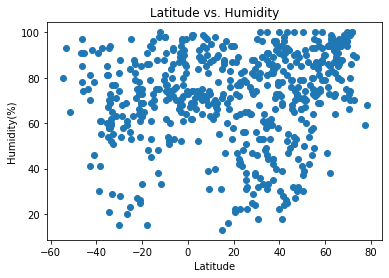

In [79]:
#create a scatter plot for latitude vs humidity to see the relationship between them
y2 = weather_data["Humidity"]

plt.scatter(x,y2)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Latitude vs. Humidity")
plt.savefig("latvshumidity")
plt.show()

## Latitude vs. Cloudiness Plot

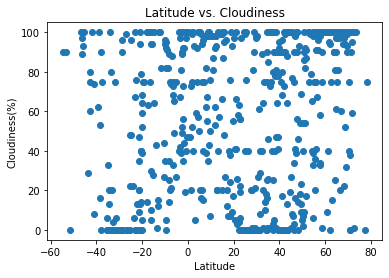

In [80]:
#create a scatter plot for latitude vs cloudiness to see the relationship between them
y3 = weather_data["Cloudiness"]

plt.scatter(x,y3)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Latitude vs. Cloudiness")
plt.savefig("latvscloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

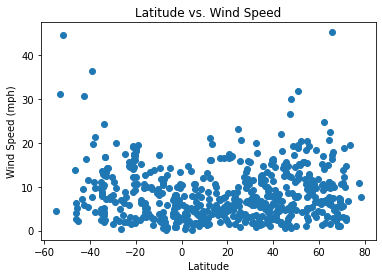

In [81]:
#create a scatter plot for latitude vs wind speed to see the relationship between them
y4 = weather_data["Wind Speed"]

plt.scatter(x,y4)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed")
plt.savefig("latvshumidity")
plt.show()

## Linear Regression

In [93]:
def lin_reg_plot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y =" + str(round(slope,2) ) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(x_values.median(), y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is : {rvalue**2}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [94]:
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Hermanus,0,ZA,1635141600,70,-34.4187,19.2345,58.08,13.02
1,Chokurdakh,100,RU,1635141600,99,70.6333,147.9167,-4.72,3.02
2,Mataura,97,NZ,1635141600,78,-46.1927,168.8643,60.85,2.71
3,Bontang,100,ID,1635141600,73,0.1333,117.5000,83.41,10.49
4,São Geraldo do Araguaia,68,BR,1635141600,92,-6.4006,-48.5550,74.19,0.56


The r-squared is : 0.8109445548677072


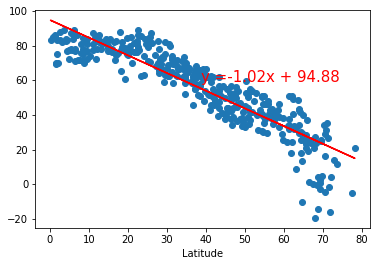

None


In [95]:
northern_hemisphere = clean_city_data.loc[clean_city_data["Latitude"]>= 0]
southern_hemisphere = clean_city_data.loc[clean_city_data["Latitude"]< 0]

x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Max Temp"]


#plt.savefig("scatterplotlatvsmaxtemp.north")
print(lin_reg_plot(x_values, y_values))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.5424504923232559


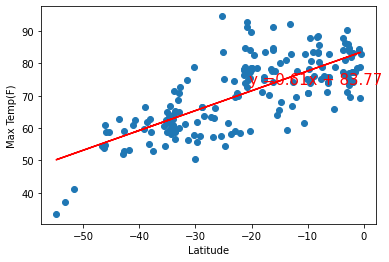

None


In [96]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Max Temp"]

plt.ylabel("Max Temp(F)")
print(lin_reg_plot(x_values, y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.04197812997764632


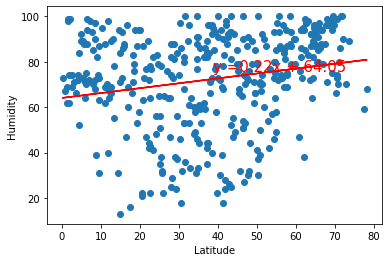

In [97]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Humidity"]

plt.ylabel("Humidity")
lin_reg_plot(x_values, y_values)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.5424504923232559


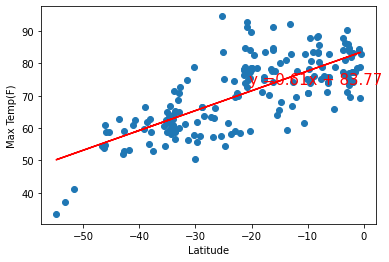

In [99]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Max Temp"]

plt.ylabel("Max Temp(F)")
lin_reg_plot(x_values, y_values)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.027741280734957907


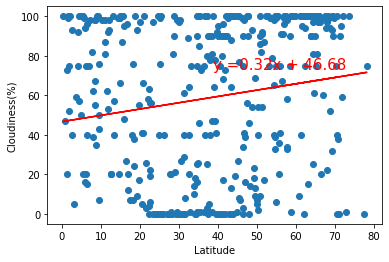

In [100]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Cloudiness"]

plt.ylabel("Cloudiness(%)")
lin_reg_plot(x_values, y_values)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.06103978555981891


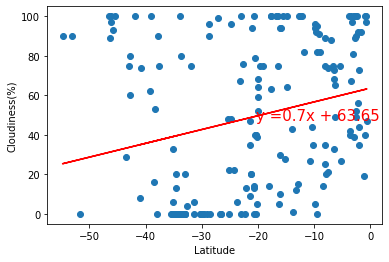

In [101]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Cloudiness"]

plt.ylabel("Cloudiness(%)")
lin_reg_plot(x_values, y_values)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.04283871684997916


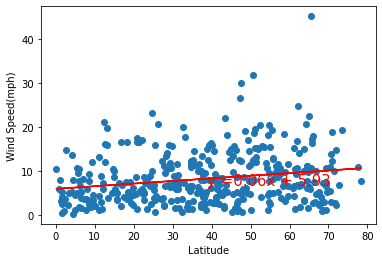

In [102]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Wind Speed"]

plt.ylabel("Wind Speed(mph)")
lin_reg_plot(x_values, y_values)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.10510541684114068


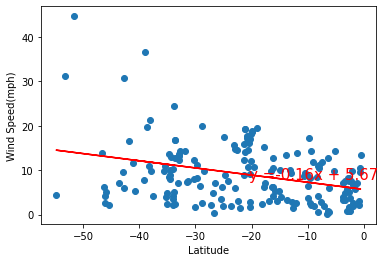

In [103]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Wind Speed"]

plt.ylabel("Wind Speed(mph)")
lin_reg_plot(x_values, y_values)